# Search advertising algorithms

The objective of this project is to understand the core of search advertising algorithms which try to efficiently match each web search query with a set of preexistent ads from companies willing to expand their consumer base.

Suppose we have 3 web advertisers named “A”, “B”, and “C” who have bid on three search terms each. Each advertiser stipulates a bid on each search term, i.e., each time an ad is displayed after a web search and clicked by a web surfer, the value of the bid is subtracted from the advertiser’s budget. In the end of the billing cycle, the total of bids is paid by the advertiser to the search engine provider. In our example, suppose that “A” and “C” has bid €2 for each search term, and “B” has bid €1 for each search term. The initial budget of “A” is €8, of “B” is €4 and of “C” is also €8. For the sake of simplicity, the click-through-rate (or CTR) which is the number of clicks that an ad receives divided by the number of times it is shown, is equal to 1<span>%</span> for “A”, “B”, and “C”.

| Advertiser    |    A    |     B     |    C     |
|---------------|---------|-----------|----------|
|               | Apple   | Apple     | Apple    |   
| _search terms_  | MacBook | Nutrition | MacBook  |  
|               | iPhone  | Health    | Computer | 

Now suppose that the following search queries arrive: "Apple", "Apple", "Apple", "Apple", "iPhone", "Nutrition", "Nutrition", "iPhone", "Nutrition", "iPhone", "iPhone", "Nutrition".

Then one can easily allocate each query with the best ad considering anticipated bids, budgets, and CTRs.

| Nbr.|  Query    | Match | Choice | Revenue |
|-----|-----------|-------|--------|---------|
|  1  | Apple     | A B C | A      |  €2   | 
|  2  | Apple     | A B C | C      |  €2   |
|  3  | Apple     | A B C | C      |  €2   |
|  4  | Apple     | A B C | C      |  €2   |
|  5  | iPhone    | A     | A      |  €2   |
|  6  | Nutrition | B     | B      |  €1   |
|  7  | Nutrition | B     | B      |  €1   |
|  8  | iPhone    | A     | A      |  €2   |
|  9  | Nutrition | B     | B      |  €1   |
|  10 | iPhone    | A     | A      |  €2   |
|  11 | iPhone    | A     | A      |  €2   |
|  12 | Nutrition | B     | B      |  €1   |
|     |           |       | TOTAL  |  €20  |

The payoff is €20 which is the optimal solution considering our constraints (bids and budgets). But it is not realistic since we do not know the whole query set previously. This solution comes from the so-called _Offline Algorithm_ which supposes that all queries are previously known.

 ## Greedy algorithm
 
There are some alternatives to the _Offline Algorithm_. One of them is the _Greedy Algorithm_ which chooses the advertiser according to with the highest bid, i.e., the one who bids higher in the arrived search term is selected. 

For the sake of simplicity, here all bid ties are broken alphabetically and in a deterministic way. So that if both “A” and “B” match with a search term, the query will be assigned to “A”.

Let's write some lines of code to compute it.
 

In [79]:
# Define bids on queries
Bids <- c(2,2,2,1,1,1,2,2,2)

# Define advertisers
Advertiser <- c("A","A","A","B","B","B","C","C","C")

# Define search terms
SearchTerm <- c("Apple","MacBook","iPhone","Apple","Nutrition","Health","Apple","MacBook","Computer")

# Define Click-Through-Rates
CTR <- c(1,1,1,1,1,1,1,1,1)

# Create dataframe with previous data
adwordsDF <- data.frame(cbind(Advertiser,Bids,SearchTerm,CTR),stringsAsFactors=FALSE)

# Convert Bids and CTR from text to numbers
adwordsDF$Bids <- as.numeric(adwordsDF$Bids)
adwordsDF$CTR <- as.numeric(adwordsDF$CTR)

# Add expected revenue in previous dataframe
adwordsDF$ER <- adwordsDF$Bids*adwordsDF$CTR

# Create budgets for each advertiser
adwordsDF$Budget <- 0
adwordsDF$Budget[adwordsDF$Advertiser=="A"] <- 8
adwordsDF$Budget[adwordsDF$Advertiser=="B"] <- 4
adwordsDF$Budget[adwordsDF$Advertiser=="C"] <- 8

# Define search queries
searchQueries <- c("Apple", "Apple", "Apple", "Apple", "iPhone", "Nutrition", "Nutrition", "iPhone", "Nutrition", "iPhone", "iPhone", "Nutrition")

# Define payoff
Payoff <- 0

# Create dataframe to save results
ResultDF <- data.frame(Search=character(),Match=character(),Choice=character(),Revenue=numeric(),stringsAsFactors=FALSE)

In [80]:
# Greedy Algorithm

for(i in searchQueries){
  # find matching bid to search query
  MatchSubset <- adwordsDF[adwordsDF$SearchTerm==i,]
  # Only keep advertisers with enough budget left
  BudgetSubset <- MatchSubset[MatchSubset$Budget>=MatchSubset$Bids,]
  # Only keep bids with highest ER
  HighestER <- BudgetSubset[BudgetSubset$ER==max(BudgetSubset$ER),]
  
  if (is.na(HighestER$Advertiser[1])){
    ResultDF <- rbind(ResultDF,data.frame(Search=i,Match=paste(MatchSubset$Advertiser,collapse=" or "), Choice="-",Revenue=0))
    
  }else{
    # Rule of multiple advertisers have the highest ER for search query
    indexing <- adwordsDF$Advertiser==HighestER$Advertiser[1]
    adwordsDF$Budget[indexing] <- adwordsDF$Budget[indexing]-HighestER$Bids[1]
    Payoff <- Payoff+HighestER$Bids[1]
    ResultDF <- rbind(ResultDF,data.frame(Search=i,Match=paste(MatchSubset$Advertiser,collapse=" or "), Choice=HighestER$Advertiser[1],Revenue=HighestER$Bids[1]))
  }
}

Warning message in max(BudgetSubset$ER):
“no non-missing arguments to max; returning -Inf”
Warning message in max(BudgetSubset$ER):
“no non-missing arguments to max; returning -Inf”
Warning message in max(BudgetSubset$ER):
“no non-missing arguments to max; returning -Inf”
Warning message in max(BudgetSubset$ER):
“no non-missing arguments to max; returning -Inf”


Below is the result using the _Greedy Algorithm_:

In [81]:
# Greedy Algorithm results
ResultDF

Search,Match,Choice,Revenue
<chr>,<chr>,<chr>,<dbl>
Apple,A or B or C,A,2
Apple,A or B or C,A,2
Apple,A or B or C,A,2
Apple,A or B or C,A,2
iPhone,A,-,0
Nutrition,B,B,1
Nutrition,B,B,1
iPhone,A,-,0
Nutrition,B,B,1


In [82]:
# Greedy Algorithm payoff
Payoff

[1] 12

As we can see, the payoff is lower than the _Offline Algorithm_. The Competitive Ratio (or CR) of the _Greedy Algorithm_ is its payoff divided by the optimum payoff, €12 / €20 or 0.6.

The reason for this lower payoff is the fact that only targeting the highest bid possible, the _Greedy Algorithm_ does not care about the advertiser’s budget. In our case, “A” ran out of funds quickly and the next eligible queries were not able to be allocated to it. In the end, we have unfulfilled queries and unused budget.

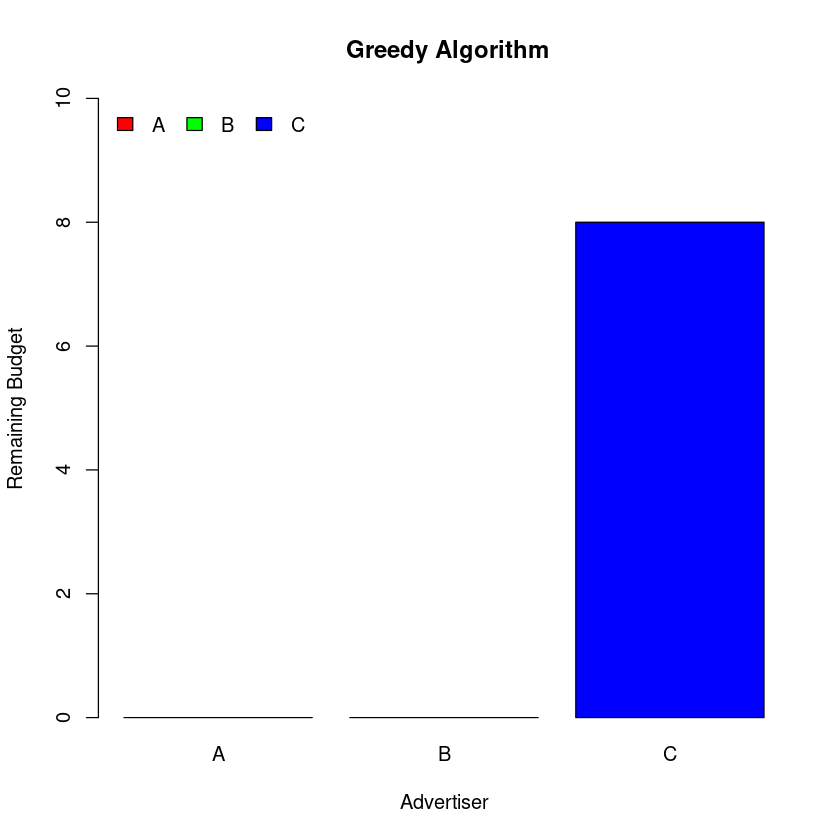

In [83]:
# Plot remain budget for Greedy Algorithm
remainBudget <- c(unique(adwordsDF$Budget[adwordsDF$Advertiser=="A"]),unique(adwordsDF$Budget[adwordsDF$Advertiser=="B"]),unique(adwordsDF$Budget[adwordsDF$Advertiser=="C"]))
barplot(remainBudget,main=" Greedy Algorithm",xlab="Advertiser",ylab="Remaining Budget",names.arg=c("A","B","C"),col=c("red","green","blue"),ylim=c(0,10))
legend("topleft", legend=c("A","B","C"),fill=c("red","green","blue"),bty = "n",horiz=TRUE)

## Balance algorithm

To increase the CR, we may use an algorithm that considers not the highest bids, but the advertiser’s available budget, that is, the _Balance Algorithm_. Again, all bid ties are broken alphabetically and in a deterministic way. Below are the results using the _Balance Algorithm_.

In [84]:
# Create budgets for each advertiser
adwordsDF$Budget <- 0
adwordsDF$Budget[adwordsDF$Advertiser=="A"] <- 8
adwordsDF$Budget[adwordsDF$Advertiser=="B"] <- 4
adwordsDF$Budget[adwordsDF$Advertiser=="C"] <- 8

# Define payoff
Payoff <- 0

# Create dataframe to save results
ResultDF <- data.frame(Search=character(),Match=character(),Choice=character(),Revenue=numeric(),stringsAsFactors=FALSE)

## Balance Algorithm ##

for(i in searchQueries){
  # find matching bid to search query
  MatchSubset <- adwordsDF[adwordsDF$SearchTerm==i,]
  # Only keep advertisers with enough budget left
  BudgetSubset <- MatchSubset[MatchSubset$Budget>=MatchSubset$Bids,]
  # Only keep bids with highest budget
  HighestBD <- BudgetSubset[BudgetSubset$Budget==max(BudgetSubset$Budget),]
  
  if (is.na(HighestBD$Advertiser[1])){
    ResultDF <- rbind(ResultDF,data.frame(Search=i,Match=paste(MatchSubset$Advertiser,collapse=" or "), Choice="-",Revenue=0))
    
  }else{
    # Rule of multiple advertisers have the highest ER for search query
    indexing <- adwordsDF$Advertiser==HighestBD$Advertiser[1]
    adwordsDF$Budget[indexing] <- adwordsDF$Budget[indexing]-HighestBD$Bids[1]
    Payoff <- Payoff+HighestBD$Bids[1]
    ResultDF <- rbind(ResultDF,data.frame(Search=i,Match=paste(MatchSubset$Advertiser,collapse=" or "), Choice=HighestBD$Advertiser[1],Revenue=HighestBD$Bids[1]))
  }
}

Warning message in max(BudgetSubset$Budget):
“no non-missing arguments to max; returning -Inf”
Warning message in max(BudgetSubset$Budget):
“no non-missing arguments to max; returning -Inf”


In [85]:
ResultDF

Search,Match,Choice,Revenue
<chr>,<chr>,<chr>,<dbl>
Apple,A or B or C,A,2
Apple,A or B or C,C,2
Apple,A or B or C,A,2
Apple,A or B or C,C,2
iPhone,A,A,2
Nutrition,B,B,1
Nutrition,B,B,1
iPhone,A,A,2
Nutrition,B,B,1


In [86]:
Payoff

[1] 16

The _Balance Algorithm_ payoff is €16 and its CR is 0.8. An improvement compared with the _Greedy Algorithm_. The second and fourth queries are assigned to “C” which made the budget available to “A” afterward to avoid unallocated queries like in the _Greedy Algorithm_. Nevertheless, it is still below the optimal solution. By looking exclusively at the advertiser’s budget, the _Balance Algorithm_ may miss opportunities for higher revenues in some queries. This did not occur in our example, but it is a major drawback of the _Balance Algorithm_. Still, the _Balance Algorithm_ did not make use of all budgets.

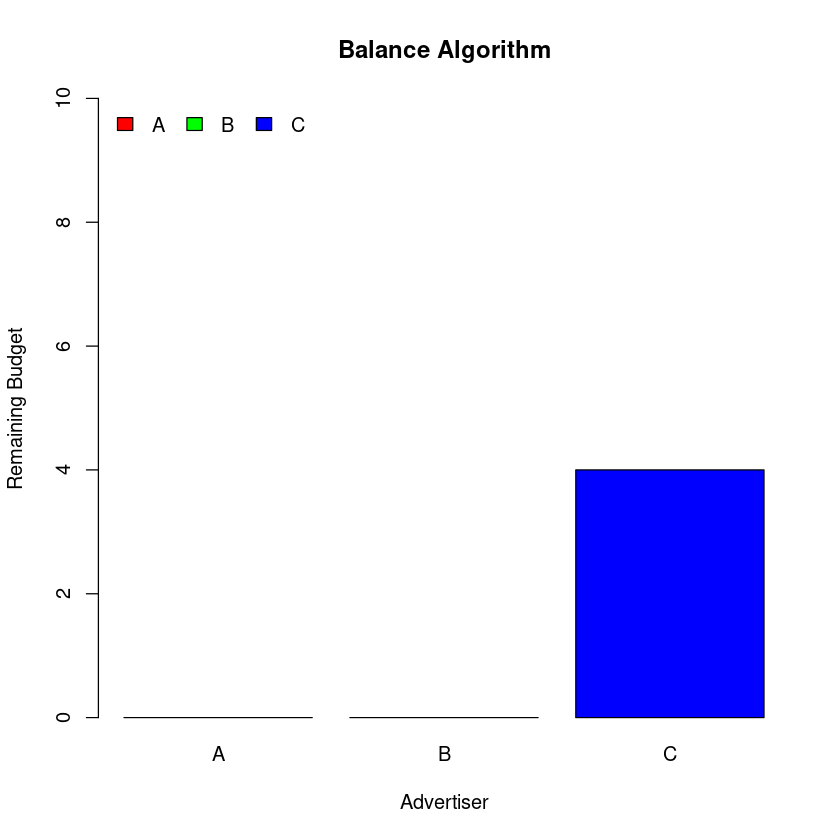

In [87]:
# Plot remain budget for Balance Algorithm
remainBudget <- c(unique(adwordsDF$Budget[adwordsDF$Advertiser=="A"]),unique(adwordsDF$Budget[adwordsDF$Advertiser=="B"]),unique(adwordsDF$Budget[adwordsDF$Advertiser=="C"]))
barplot(remainBudget,main="Balance Algorithm",xlab="Advertiser",ylab="Remaining Budget",names.arg=c("A","B","C"),col=c("red","green","blue"),ylim=c(0,10))
legend("topleft", legend=c("A","B","C"),fill=c("red","green","blue"),bty = "n",horiz=TRUE)

Suppose now that “B” has a budget of €20 and “C” a budget of €18 (“A” budget remains the same, i.e., €8). Using the same _Balance Algorithm_, we got the following results.

In [88]:
# Create budgets for each advertiser
adwordsDF$Budget <- 0
adwordsDF$Budget[adwordsDF$Advertiser=="A"] <- 8
adwordsDF$Budget[adwordsDF$Advertiser=="B"] <- 20
adwordsDF$Budget[adwordsDF$Advertiser=="C"] <- 18

# Define payoff
Payoff <- 0

# Create dataframe to save results
ResultDF <- data.frame(Search=character(),Match=character(),Choice=character(),Revenue=numeric(),stringsAsFactors=FALSE)

# Balance Algorithm

for(i in searchQueries){
  # find matching bid to search query
  MatchSubset <- adwordsDF[adwordsDF$SearchTerm==i,]
  # Only keep advertisers with enough budget left
  BudgetSubset <- MatchSubset[MatchSubset$Budget>=MatchSubset$Bids,]
  # Only keep bids with highest budget
  HighestBD <- BudgetSubset[BudgetSubset$Budget==max(BudgetSubset$Budget),]
  
  if (is.na(HighestBD$Advertiser[1])){
    ResultDF <- rbind(ResultDF,data.frame(Search=i,Match=paste(MatchSubset$Advertiser,collapse=" or "), Choice="-",Revenue=0))
    
  }else{
    # Rule of multiple advertisers have the highest ER for search query
    indexing <- adwordsDF$Advertiser==HighestBD$Advertiser[1]
    adwordsDF$Budget[indexing] <- adwordsDF$Budget[indexing]-HighestBD$Bids[1]
    Payoff <- Payoff+HighestBD$Bids[1]
    ResultDF <- rbind(ResultDF,data.frame(Search=i,Match=paste(MatchSubset$Advertiser,collapse=" or "), Choice=HighestBD$Advertiser[1],Revenue=HighestBD$Bids[1]))
  }
}

In [89]:
ResultDF

Search,Match,Choice,Revenue
<chr>,<chr>,<chr>,<dbl>
Apple,A or B or C,B,1
Apple,A or B or C,B,1
Apple,A or B or C,B,1
Apple,A or B or C,C,2
iPhone,A,A,2
Nutrition,B,B,1
Nutrition,B,B,1
iPhone,A,A,2
Nutrition,B,B,1


In [90]:
Payoff

[1] 17

This time the payoff increased to €17 since there are no unallocated queries like in the last result. Allocation is a little bit different from the previous one and the main drawback of the _Balance Algorithm_ is present: first, the second and third query was allocated to “B” (instead of “A” – higher bid) because of the higher budget of “B”.

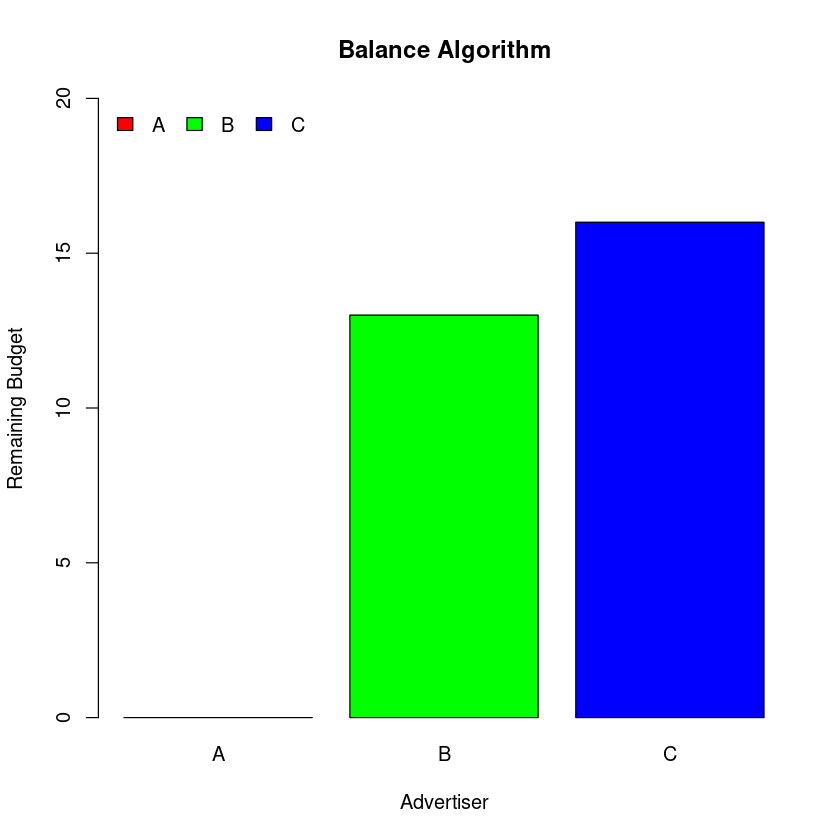

In [91]:
# Plot remain budget for Balance Algorithm
remainBudget <- c(unique(adwordsDF$Budget[adwordsDF$Advertiser=="A"]),unique(adwordsDF$Budget[adwordsDF$Advertiser=="B"]),unique(adwordsDF$Budget[adwordsDF$Advertiser=="C"]))
barplot(remainBudget,main="Balance Algorithm",xlab="Advertiser",ylab="Remaining Budget",names.arg=c("A","B","C"),col=c("red","green","blue"),ylim=c(0,20))
legend("topleft", legend=c("A","B","C"),fill=c("red","green","blue"),bty = "n",horiz=TRUE)

In the end, besides having a higher payoff, the total of unused budgets is larger (€29 compared to €4) which is may be an indication of revenue lost.

## Generalized Balance Algorithm

The _Generalized Balance Algorithm_ is a hybrid solution between the _Greedy Algorithm_ and the _Balance Algorithm_. It considers both the value of the bid and the advertiser’s budget. This is done by computing and selecting the highest value of a function which accounts for the two criteria.          
<br>
<a href="https://www.codecogs.com/eqnedit.php?latex=\psi&space;_{i}\left(q\right)&space;=x_{i}\left(1-e^{f_{i}}\right)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\psi&space;_{i}\left(q\right)&space;=x_{i}\left(1-e^{f_{i}}\right)" title="\psi _{i}\left(q\right) =x_{i}\left(1-e^{f_{i}}\right)" /></a>
where:
* $q$ means _query_
* $x_{i}$ means _bid value of bidder i_
* $f_{i}$ means _fraction of budget left over_

In [92]:
# Create budgets for each advertiser
adwordsDF$Budget <- 0
adwordsDF$Budget[adwordsDF$Advertiser=="A"] <- 8
adwordsDF$Budget[adwordsDF$Advertiser=="B"] <- 20
adwordsDF$Budget[adwordsDF$Advertiser=="C"] <- 18

adwordsDF$InitBudget <- 0
adwordsDF$InitBudget[adwordsDF$Advertiser=="A"] <- 8
adwordsDF$InitBudget[adwordsDF$Advertiser=="B"] <- 20
adwordsDF$InitBudget[adwordsDF$Advertiser=="C"] <- 18

# Define payoff
Payoff <- 0

# Create dataframe to save results
ResultDF <- data.frame(Search=character(),Match=character(),Choice=character(),Revenue=numeric(),stringsAsFactors=FALSE)

# Generalized Balance Algorithm

for(i in searchQueries){
  # find matching bid to search query
  MatchSubset <- adwordsDF[adwordsDF$SearchTerm==i,]
  # Only keep advertisers with enough budget left
  BudgetSubset <- MatchSubset[MatchSubset$Budget>=MatchSubset$Bids,]
  # Only keep bids with highest Psi function value
  psi <- BudgetSubset$Bids*(1-exp(-BudgetSubset$Budget/BudgetSubset$InitBudget))
  HighestPSI <- BudgetSubset[psi==max(psi),]
  
  if (is.na(HighestPSI$Advertiser[1])){
    ResultDF <- rbind(ResultDF,data.frame(Search=i,Match=paste(MatchSubset$Advertiser,collapse=" or "), Choice="-",Revenue=0))
    
  }else{
    # Rule of multiple advertisers have the highest ER for search query
    indexing <- adwordsDF$Advertiser==HighestPSI$Advertiser[1]
    adwordsDF$Budget[indexing] <- adwordsDF$Budget[indexing]-HighestPSI$Bids[1]
    Payoff <- Payoff+HighestPSI$Bids[1]
    ResultDF <- rbind(ResultDF,data.frame(Search=i,Match=paste(MatchSubset$Advertiser,collapse=" or "), Choice=HighestPSI$Advertiser[1],Revenue=HighestPSI$Bids[1]))
  }
}

Warning message in max(psi):
“no non-missing arguments to max; returning -Inf”


In [93]:
ResultDF

Search,Match,Choice,Revenue
<chr>,<chr>,<chr>,<dbl>
Apple,A or B or C,A,2
Apple,A or B or C,C,2
Apple,A or B or C,C,2
Apple,A or B or C,C,2
iPhone,A,A,2
Nutrition,B,B,1
Nutrition,B,B,1
iPhone,A,A,2
Nutrition,B,B,1


In [94]:
Payoff

[1] 18

So far, it is the best payoff computed, €18. The CR is also the highest: 0.9. Compared with the _Balance Algorithm_, it solves the latter major drawback. For instance, queries 2 and 3 are allocated to “C” (highest bid) instead of “B” (highest budget). Nevertheless, there is room for improvement: query 11 was unallocated due to “A” have already run out of funds. But this result is considered very good since it is only 10<span>%</span> below the optimal solution.

Below are the remaining budgets of the _Generalized Balance Algorithm_.

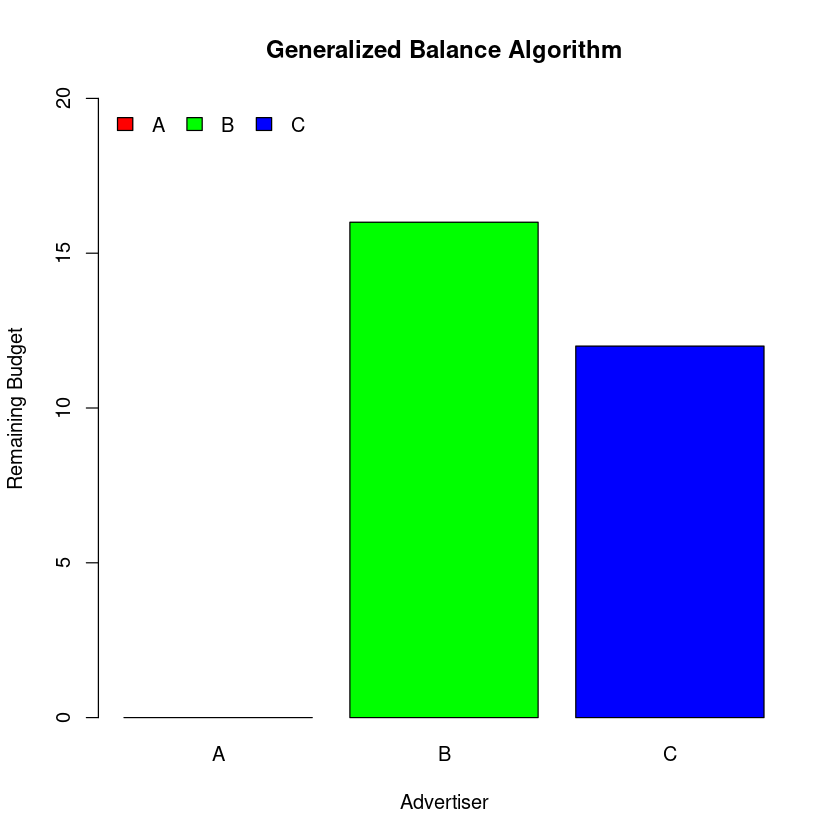

In [95]:
# Plot remain budget for Generalized Balance Algorithm 
remainBudget <- c(unique(adwordsDF$Budget[adwordsDF$Advertiser=="A"]),unique(adwordsDF$Budget[adwordsDF$Advertiser=="B"]),unique(adwordsDF$Budget[adwordsDF$Advertiser=="C"]))

barplot(remainBudget,main="Generalized Balance Algorithm",xlab="Advertiser",ylab="Remaining Budget",names.arg=c("A","B","C"),col=c("red","green","blue"),ylim=c(0,20))
legend("topleft", legend=c("A","B","C"),fill=c("red","green","blue"),bty = "n",horiz=TRUE)

As we can see, the available resources (budgets) are better utilized with the _Generalized Balance Algorithm_ – €28 compared to €29). “B” (lower bid) has also a larger remain budget than “C” (higher bid).

## Conclusion

In this project, we explored a relevant mechanism in today’s digital marketing: search advertising. The main challenge of search advertising is matching search queries with relevant web ads to satisfy web surfers and advertisers. A significant amount of money is involved in this kind of marketing and makes millions for search engine companies like Google. In the end, we could test different approaches and compared them to a theoretical benchmark.